<p> <center> <h1>Exploring regular and chaotic evolutions </h1> </center> </p>

<p><h5 align="right"> <i>Santiago Baca - A01656580</i> </h5></p>

<br><br>

<b> 1. Periodic and quasi-periodic evolutions </b>

Consider the following functions:
$$x_{t} = cos(2t)$$
$$y_{t} = cos(2t) + sin(2t)$$
$$z_{t} = cos(2t) + sin(πt)$$

Two of these functions result in periodic evolution, and one in quasi-periodic. Let's study their behavior. I recommend you make a figure with 6 panels (two rows with three columns).  
  
**a)** In the first row, make a line graph of the evolution of each function with respect to time. I recommend using a small maximum time so that the figure does not become saturated. Use $δt = 0.05$. To evaluate $π$ I recommend using numpy.pi  
**b)** In the second row we are going to graph $u(t)$ vs $u[t+1]$ for each of the functions. In this case use a scatter plot.  
**c)** Compare the behaviors.  

<br>

**a)** and **b)**

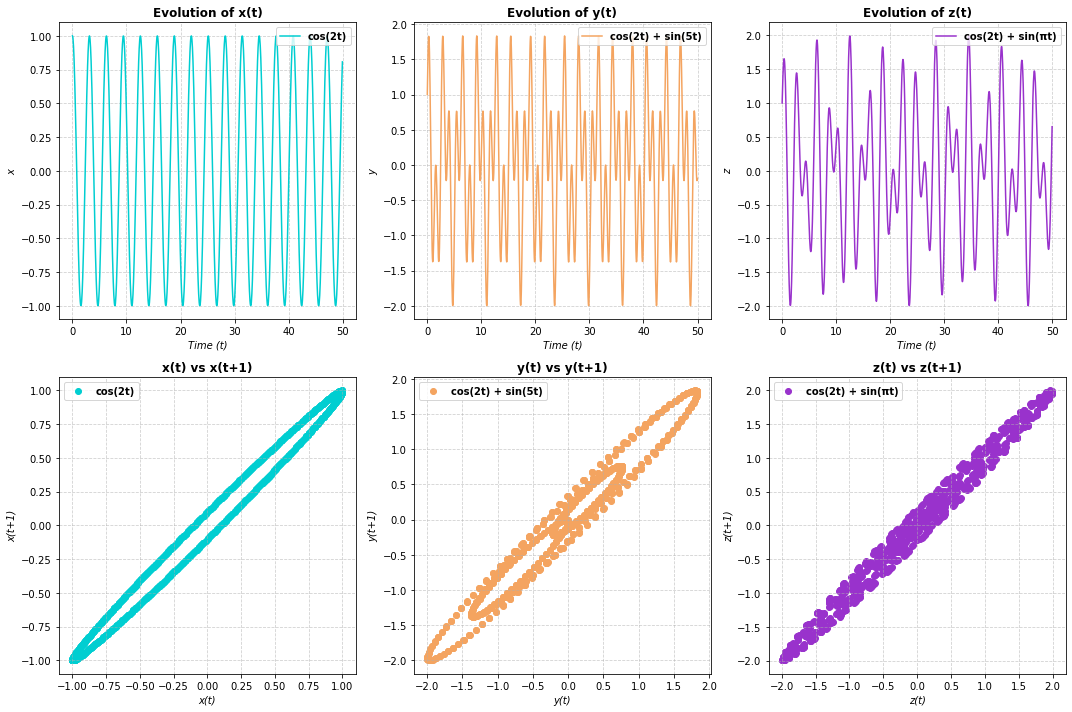

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions for x, y, z
def solve_x(t):
    x = np.cos(2 * t)
    return x

def solve_y(t):
    y = np.cos(2 * t) + np.sin(5 * t)
    return y

def solve_z(t):
    z = np.cos(2 * t) + np.sin(np.pi * t)
    return z

# Graph the evolution of functions with respect to time
def plotEvolution(index,labels,solutions,colors):
    plt.subplot(2, 3, index+1)
    plt.plot(t, solutions[index], color = colors[index], label=labels[1][index])
    plt.title(f'Evolution of {labels[0][index]}(t)', fontweight='bold')
    plt.xlabel('Time (t)', fontstyle='italic')
    plt.ylabel(f'{labels[0][index]}', fontstyle='italic')
    plt.legend(loc='upper right', prop={'weight':'bold'})
    plt.grid(True, linestyle='--', alpha=0.6)

# Plot the dispersion of in u(t) or u(t+1)
def plotDispersion(index,labels,solutions,colors):
    plt.subplot(2, 3, index+4)
    plt.scatter(solutions[index][:-1], solutions[index][1:], color = colors[index], label=labels[1][index])
    plt.title(f'{labels[0][index]}(t) vs {labels[0][index]}(t+1)', fontweight='bold')
    plt.xlabel(f'{labels[0][index]}(t)', fontstyle='italic')
    plt.ylabel(f'{labels[0][index]}(t+1)', fontstyle='italic')
    plt.legend(prop={'weight':'bold'})
    plt.grid(True, linestyle='--', alpha=0.6)

# Define and calculate values for our evolution and scatter plots
t = np.arange(0, 50, 0.05) # time arrangement with step δt = 0.05
labels = [['x','y','z'],['cos(2t)','cos(2t) + sin(5t)', 'cos(2t) + sin(πt)']]
solutions = [solve_x(t), solve_y(t), solve_z(t)]
colors = ['darkturquoise', 'sandybrown', 'darkorchid']

# Make evolution and dispersion graphs
plt.figure(figsize=(15, 10))

for i in range(len(solutions)):
    plotEvolution(i,labels,solutions,colors)
    plotDispersion(i,labels,solutions,colors)
    
plt.tight_layout()
plt.show()

**c)** 

- <u>Temporal evolutions </u>:
    - The first 2 functions, $x(t) = cos(2t)$ and $y(t) = cos(2t) + sin(5t)$, will result in a periodic evolution, since they are cyclic functions that repeat their pattern every period.
    - While the third function $z(t) = cos(2t) + sin(πt)$ will result in a quasi-periodic evolution due to the combination of a periodic function $cos(2t)$ with one that is not completely periodic $ sin(πt)$, because although it does follow a pattern, it does not repeat exactly at regular intervals.

- <u>Scatterplots $u(t)$ vs $u[t+1]$ </u>:  
    - In the case of the periodic functions $x(t)$ and $y(t)$, a clearer structure can be observed in the form of points grouped in specific patterns, reflecting the periodicity of the functions.
    - For the quasi-periodic function $z(t)$, although patterns will be observed, they will not be as repetitive or regular as in the case of periodic functions. The distribution of points will not form clear and regular groups, showing a mixture of periodic and aperiodic behavior.

In general, if we look at a specific point at random in $x(t)$ and $y(t)$ it is quite likely that that point will not fall within the orbit, that is, that it will not touch one of the grouped points . On the other hand, if we look at a specific point at random in $z(t)$ it is almost certain that the point will fall into the orbit generated by the function, due to the irregularity in its periods.

<br><br><br><br>

<b> 2. Henón's Map </b>

Let's explore a very famous map. Its evolution is given by the following system of difference equations. 
$$x_{t+1} = 1 - a \cdot x_{t}^2 + y_{t}$$
$$y_{t+1} = b \cdot x_{t}$$

**a)** How many variables does the map have? Is it invertible? Given this, can we rule out chaos?  
**b)** Find the fixed points on the map.  
**c)** What is the restriction for the fixed points to be real? In what scenarios is there only one fixed point? (You must find relationships between the two parameters).  
**d)** Program the Heno map in Python. Graph the evolution of each variable, and the phase space. Use {a = 1, b = 0.3}.  
**e)** Program the Heno map in Python. Graph the evolution of each variable, and the phase space. Use {a = 1.4, b = 0.3}.  
**f)** Compare the behaviors of the two previous solutions. (Describe the type of behavior based on what you see.)  
Note: you have to choose a number of time steps and an initial condition for the 2 problems above. Explore and decide what to use.  

**a)** This map has 2 variables, $x$ and $y$. The system is not invertible due to the presence of a quadratic element $x_{t}^2$ in the first equation, since to affirm that the system is invertible we require the condition that different inputs correspond to different outputs $x_{ t+1} \rightarrow x_{t}$, which is not true due to the aforementioned characteristic of the first equation, which causes there to be a positive and a negative value for the same point.   
As for chaos, we cannot completely rule it out, since whether the system is invertible or not is only one of the aspects to consider. In fact, in this case, being a non-invertible system, it is enough for our map to have N ≥ 1 variables for chaos to exist.  
  
<br><br><br> 

**b)** To find the fixed points, simply set $x_{t+1}$ equal to $x_{t}$ y $y_{t+1}$ a $y_{t}$:
$$x_{t} = 1 - a \cdot x_{t}^2 + y_{t}$$
$$y_{t} = b \cdot x_{t}$$
Substituting $y_{t}$ into the first equation, we get:
$$x_{t} = 1 - a \cdot x_{t}^2 + b \cdot x_{t}$$
Rearrange and equalize to 0:
$$ - a \cdot x_{t}^2 - x_{t} + b \cdot x_{t} + 1= 0$$
Factor and change the signs to simplify the equation:
$$ - a \cdot x_{t}^2 + x_{t} \cdot (-1 + b) + 1= 0$$
$$ a \cdot x_{t}^2 - x_{t} \cdot (-1 + b) - 1= 0$$
$$ a \cdot x_{t}^2 + x_{t} \cdot (1 - b) - 1= 0$$
Let's note that this is a quadratic equation, so we solve with quadratic formula:
$$x = \frac{-b ± \sqrt{b^2 - 4ac}}{2a}$$
Substitute with the coefficients $a=a$, $b=(1-b)$ and $c=-1$
$$x_{t} = \frac{-(1-b) ± \sqrt{(1-b)^2 - 4a(-1)}}{2a}$$
Simplifying:
$$x_{t} = \frac{(b-1) ± \sqrt{1 - 2b + b^2 + 4a}}{2a}$$
Finally we rearrange and get to our final expression for the fixed points:
$$x_{t} = \frac{(b-1) ± \sqrt{b^2 - 2b + 4a + 1}}{2a} \qquad (1)$$

<br><br><br> 

**c)** Let us note that expression (1) is indeterminate at $2a = 0$ in the denominator, and its solution becomes complex when the determinant $b^2 - 2b + 4a + 1 < 0$. Therefore, we consider these 2 cases as the constraints on our system, so that the fixed points are real. Let's solve for both cases:
$$2a = 0$$
$$a = 0 \qquad (2)$$

<br><br>  

To solve the determinant for b, we will use the quadratic formula with coefficients $a=1$, $b=-2$ and $c=(4a + 1)$:
$$b < \frac{-(-2) ± \sqrt{(-2)^2 - 4(1)(4a + 1)}}{2(1)}$$
Simplify and get to our final expression:
$$b < \frac{2 ± \sqrt{4 - 16a - 4}}{2}$$
$$b < \frac{2 ± 4\sqrt{-a}}{2}$$
Finally, notice that we have a negative root in our expression, so we assume that $a<0$ for the solution to be real:
$$a < 0, \qquad b < 1 ± 2\sqrt{-a} \qquad (3)$$

<br><br>  

Likewise, we solve the determinant for a, such that:
$$4a + b^2 - 2b + 1 < 0$$
Subtract everything that does not depend on $a$:
$$4a < - b^2 + 2b - 1$$
Divide both sides of the equation by 4.
$$a < - \frac{b^2}{4} + \frac{2b}{4} - \frac{1}{4}$$
Simplifying:
$$a < - \frac{b^2}{4} + \frac{b}{2} - \frac{1}{4}$$
Finally we rearrange and reach our final expression:
$$a < - \frac{b^2 + 1}{4} + \frac{b}{2} \qquad (4)$$

<br><br>  

Therefore, recapitulating, our constraints for the fixed points are given by equations (2), (3) and (4) as follows:
* For a:
$$a = 0$$
$$a < - \frac{b^2 + 1}{4} + \frac{b}{2}$$
* For b:
$$a < 0, \qquad b < 1 ± 2\sqrt{-a}$$

<br><br><br> 

**d) y e)**

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Function that returns the solutions for x and y of the Henón's map
def henonMap(x, y, a, b):
    x_next = 1 - a * x**2 + y
    y_next = b * x
    return x_next, y_next


# Function that returns the values of x, y, t to graph them
def values(n_steps, x_init, y_init):
    t_values = np.linspace(0, n_steps, n_steps)
    x_values = np.zeros(n_steps)
    y_values = np.zeros(n_steps)

    x_values[0] = x_init
    y_values[0] = y_init

    for i in range(1, n_steps):
        x_values[i], y_values[i] = henonMap(x_values[i-1], y_values[i-1], a, b)

    return t_values, x_values, y_values


def plotHenonMap(a, b, n_steps, x_init, y_init):
    # Calculate the values for our time evolution graph
    t_values, x_values, y_values = values(n_steps, x_init, y_init)

    plt.figure(figsize=(20, 17))

    # Graph time vs position x(t)
    plt.subplot(3, 2, 1)
    plt.plot(t_values, x_values, label='x', color='deeppink', marker='o')
    plt.title(f'Evolution of X over time (a={a}, b={b})', fontweight='bold')
    plt.xlabel('Time (t)', fontstyle='italic')
    plt.ylabel('x(t)', fontstyle='italic')
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Graph time vs position y(t)
    plt.subplot(3, 2, 2)
    plt.plot(t_values, y_values, label='y', color='limegreen', marker='o')
    plt.title(f'Evolution of Y over time (a={a}, b={b})', fontweight='bold')
    plt.xlabel('Time (t)', fontstyle='italic')
    plt.ylabel('y(t)', fontstyle='italic')
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Graph time vs position y(t) and x(t)
    plt.subplot(3, 2, 3)
    plt.plot(t_values, x_values, label='x', color='deeppink', marker='o')
    plt.plot(t_values, y_values, label='y', color='limegreen', marker='o')
    plt.title(f'Evolution of X and Y over time (a={a}, b={b})', fontweight='bold')
    plt.xlabel('Time (t)', fontstyle='italic')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(prop={'weight':'bold'})

    # Calculate the values for our phase space graph
    t_values, x_values, y_values = values(n_steps*100, x_init, y_init)
    
    # Graficar x(t) vs y(t)
    plt.subplot(3, 2, 4)
    plt.plot(x_values, y_values, '.', markersize=5, color='crimson')
    plt.title(f'Phase space (a={a}, b={b})', fontweight='bold')
    plt.xlabel('x(t)', fontstyle='italic')
    plt.ylabel('y(t)', fontstyle='italic')
    plt.grid(True, linestyle='--', alpha=0.6)

    # plt.suptitle('Evolution of x(t) and y(t) for different parameters a and b', fontweight='bold')
    plt.tight_layout()
    plt.show()



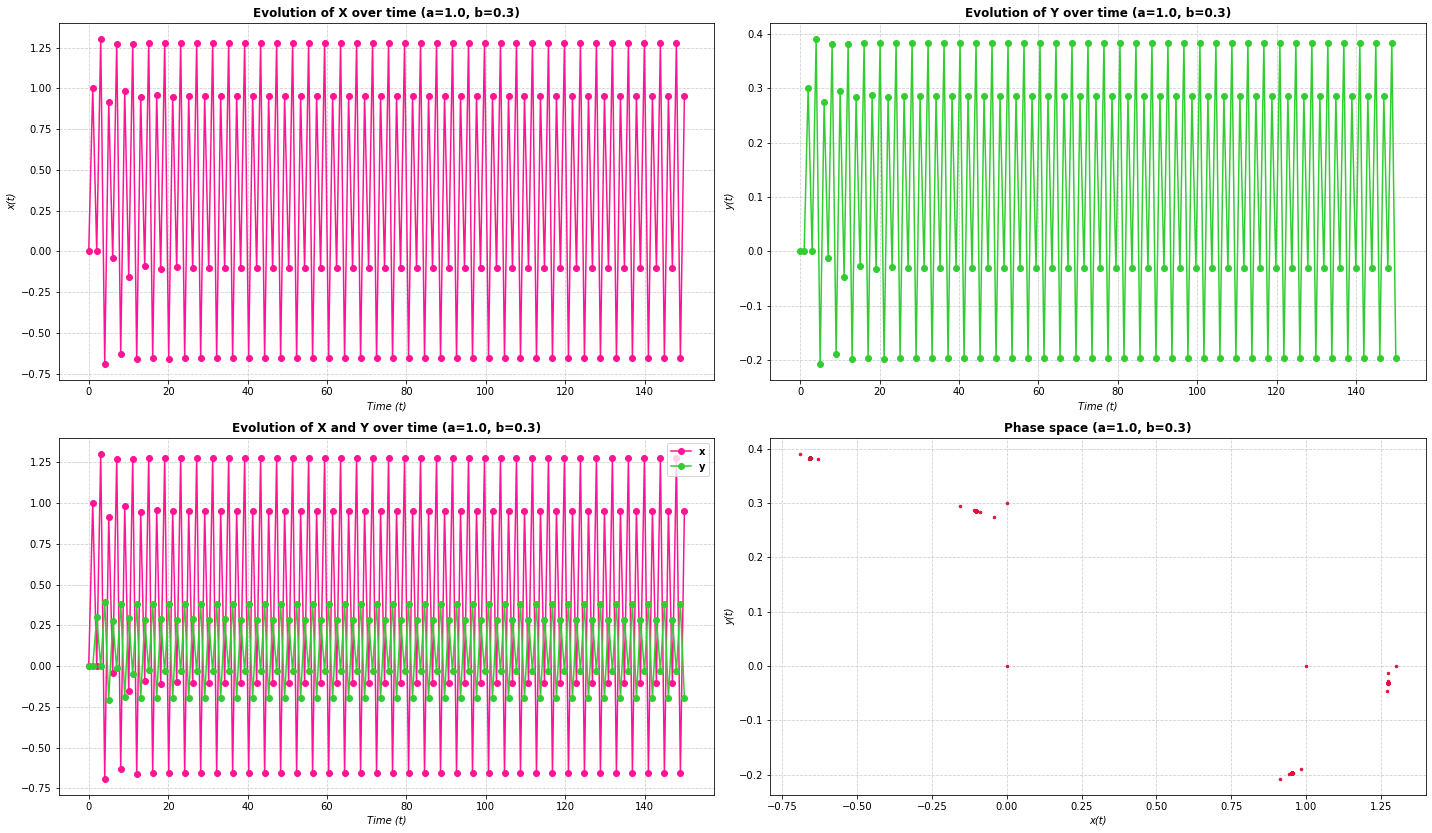

In [9]:
# Define initial conditions
n_steps = 150
x_init = 0
y_init = 0

# Graph from the coefficients for part d)
a = 1.0
b = 0.3
plotHenonMap(a, b, n_steps, x_init, y_init)

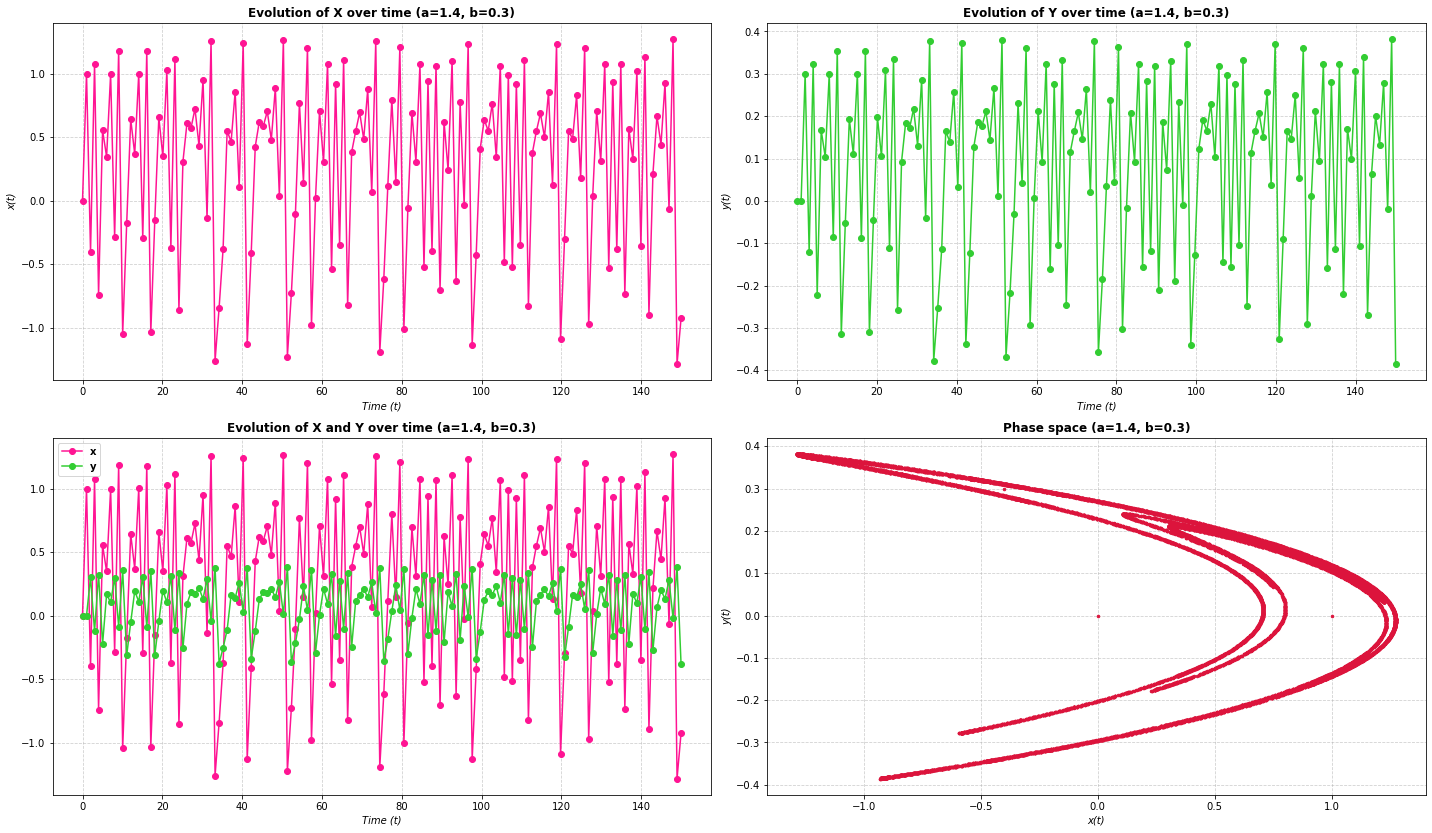

In [10]:
# Graph from the coefficients for part e)
a = 1.4
b = 0.3
plotHenonMap(a, b, n_steps, x_init, y_init)

**f)** The difference in the values of the parameters $a$ and $b$ can lead to different behaviors in the Henón map. In this case, we can note that higher values of $a$ can lead to non-linear chaotic behaviors or the appearance of multiple fixed points.  
Which demonstrates the sensitivity of the system to the initial conditions and parameters, a characteristic behavior of nonlinear and chaotic dynamic systems, such as the case of $a = 1.4$ in the Henón map.

<br><br><br><br>

<b> 3. The Lotka-Volterra model </b>

Consider two interacting species: rabbits $x≥0$ and wolves $y≥0$. The following model describes the evolution of the two populations.
$$\frac{dx}{dt} = αx - βxy, \qquad x(0)=x_{0}$$
$$\frac{dy}{dt} = µxy - γy, \qquad y(0)=y_{0}$$
with the following parameters: ${α≥0, β≥0, µ≥0, γ≥0}$

**a)** Identify if the system is linear or not, if it is autonomous or not, and if it is homogeneous or not. Using the Poincaré-Bendixon Theorem, can we rule out chaos?  
**b)** Interpret each of the equations. What do the parameters mean? From here, and to simplify our lives, let's consider $µ = β$. What does this simplification mean?  
**c)** Calculate the divergence of the vector field on the right side of the differential equation. What does this tell you about the type of behavior in phase space? Can we do global or local classification?  
**d)** Find the implicit solution to this system. Hint, you will have an expression of the following form: $g(y;α,β) = C - g(x;γ,β)$
Where C is a constant, and $g(\cdot)$ is a function that has a linear term and a logarithmic term.  
**e)** Calculate the fixed points of the system.  
**f)** Calculate the Jacobian of the system, evaluate it at the fixed points and their eigenvalues. This will give you its stability.  
**g)** With the previous analysis, you can now sketch the orbits of the system.  
**h)** Numerically integrate the system with $α=\frac{1}{3}, γ=\frac{4}{3}, β=1$. It shows 3 graphs: the evolution of each variable with respect to time, and the phase space. Repeat the experiment with values of your choice.  
**i)** How could you make this chaotic model? (Hint: how would you avoid the Poincaré-Bendixon restriction). Integrate the system numerically to see if you have indeed achieved chaos.  

**a)** 

- <u> Linearity </u>: The system of equations is NOT linear due to non-linear terms $x \cdot y$ present in both differential equations.  
  
- <u> Autonomy </u>: The system IS autonomous since the equations do not explicitly depend on time $t$.  

- <u>Homogeneity </u>: The system IS homogeneous since the equations do not present independent terms or functions with respect to other variables.  

- <u>Poincaré-Bendixon Theorem </u>: YES we can rule out chaos, because this theorem declares that for nonlinear systems less than 3 dimensions like ours, chaos cannot take place.  

<br><br>

**b)**

- $\frac{dx}{dt} = αx - βxy$: This equation describes the rate of change of the rabbit population $x$. The term $\alpha x$ represents the rate of rabbit population growth, or reproduction, with $\alpha$ as its coefficient; while $\beta xy$ represents the rate of decrease of rabbits due to interaction with wolves, or stiff rabbits, with coefficient $\beta$.  

- $\frac{dy}{dt} = µxy - γy$: This equation describes the rate of change of the wolf population $y$. The term $\mu xy$ represents the growth rate of the wolf population due to the number of rabbits available for hunting, or rabbit killers, with $\mu$ as its coefficient; while $\gamma y$ represents the rate of decline of the wolf population due to lack of resources or food, or competition between wolves, with coefficient $\gamma$.  

- <u>Simplification</u> $\mu = \beta$: When equality is established between $\mu$ and $\beta$, this implies that the rate at which wolves hunt rabbits $\mu xy$ is equal to the rate at which rabbits are affected by wolves $\beta xy$. In practical terms, this implies that the mutual influence between rabbit and wolf populations is equal in magnitude but with opposite effects on their respective populations.  

<br><br>

**c)**

Redefine our system of equations from the previous point, such that:
$$\frac{dx}{dt} = αx - βxy, \qquad x(0)=x_{0}$$
$$\frac{dy}{dt} = βxy - γy, \qquad y(0)=y_{0}$$
And we perform the following operation with $\frac{\partial P}{\partial x} = \frac{\partial (αx - βxy)}{\partial x}$ and $\frac{\partial Q}{\partial y} = \frac{\partial (βxy - γy)}{\partial y}$  
$$\vec{\nabla} \cdot F = \frac{\partial P}{\partial x} + \frac{\partial Q}{\partial y}$$
Perform partial derivatives and substitute:
$$\vec{\nabla} \cdot F = α - βy + βx - γ$$
Factor and get to our final expression:
$$\vec{\nabla} \cdot F = α - γ + β(x - y), \qquad (5)$$

- <u> Phase space behavior</u>: The divergence provides us with information about the variation of the flow of the vector field. If the divergence is positive at a given point, that could indicate an unstable/explosive trajectory; if negative, it could indicate a dissipative trajectory. However, in this case divergence alone does not provide complete information about the behavior of the system in phase space.

- <u> Global and local classification</u>: Globally, it is not possible to conclude anything; locally, it depends entirely on the parameters $\alpha, \gamma, \beta$.

<br><br>

**d)** 

We will solve the system by means of the method of separation of variables, but first we must find 2 expressions for $dt$ by factoring everything that does not depend on $t$ in both equations:
$$\frac{dx}{αx - βxy} = dt$$
$$\frac{dy}{βxy - γy} = dt$$
Equate these expressions and factor $x$ and $y$ on each side respectively.  
$$\frac{dx}{x(α - βy)} = \frac{dy}{y(βx - γ)}$$
Cross factors that do not depend on $x$ and $y$ respectively:
$$\frac{βx - γ}{x} \cdot dx = \frac{α - βy}{y} \cdot dy$$
Separate the fractions
$$\frac{βx}{x} \cdot dx - \frac{γ}{x} \cdot dx = \frac{α}{y} \cdot dy - \frac{βy}{y} \cdot dy$$
Simplify and integrate
$$ \int β \cdot dx - \int \frac{γ}{x} \cdot dx = \int \frac{α}{y} \cdot dy - \int β \cdot dy$$
Our final expression is:
$$ βx- γln(x) = C + αln(y) - βy, \qquad (6)$$

<br><br>

**e)**

To find the fixed points of the system we have to set our differential equations equal to 0:
$$αx - βxy = 0$$
$$βxy - γy = 0$$
To solve this 2x2 system there are multiple techniques, but it is clear to see that we can simplify the equation through the reduction method. So if we add them we have the following:
$$αx - βxy + βxy - γy = 0$$
Simplifying
$$αx - γy = 0$$
Isolate y:
$$y = \frac{αx}{\gamma}$$
Substitute in the first original expression:
$$αx - βx(\frac{αx}{\gamma}) = 0$$
Simplifying:
$$αx - \frac{βαx^2}{\gamma} = 0$$
Factor:
$$αx(1 - \frac{βx}{\gamma}) = 0$$
From where we get that:
$$x_{1}=0, \qquad x_{2}=\frac{\gamma}{\beta}$$
Substitute $x_{1}$ y $x_{2}$ in the expression calculated for $y$:
$$y_{1} = \frac{α(0)}{\gamma}$$
$$y_{2} = \frac{α(\frac{\gamma}{\beta})}{\gamma}$$
From where we get that:
$$y_{1}=0, \qquad y_{2}=\frac{\alpha}{\beta}$$

<br><br>

Therefore, the fixed points of our system are:
$$(0,0), \qquad (\frac{\gamma}{\beta},\frac{\alpha}{\beta})$$

<br><br><br>

**f)** 

The Jacobian of a system of differential equations is calculated by partially differentiating the equations with respect to the variables $x$ and $y$

$$J = 
\begin{vmatrix} 
\frac{\partial }{\partial x}(\frac{dx}{dt}) & \frac{\partial }{\partial y}(\frac{dx}{dt}) \\
\frac{\partial }{\partial x}(\frac{dy}{dt}) & \frac{\partial }{\partial y}(\frac{dy}{dt}) 
\end{vmatrix} = 
\begin{vmatrix} 
\frac{\partial }{\partial x}(αx - βxy) & \frac{\partial }{\partial y}(αx - βxy) \\
\frac{\partial }{\partial x}(βxy - γy) & \frac{\partial }{\partial y}(βxy - γy) 
\end{vmatrix} =
\begin{vmatrix} 
α - βy & -βx \\
βy & βx - γ 
\end{vmatrix}$$
Now we evaluate our fixed points calculated in the previous section, and solve to find the eigenvalues and eigenvectors:
 
<br>  

- For $(0,0)$:
$$\begin{vmatrix} 
α - β(0) & -β(0) \\
β(0) & β(0) - γ 
\end{vmatrix} =
\begin{vmatrix} 
α & 0 \\
0 & - γ 
\end{vmatrix} $$
We solve from $det(A - \lambda I) = 0$  
$$ det\begin{vmatrix} 
α - \lambda & 0 \\
0 & - γ - \lambda 
\end{vmatrix} = 
(α - \lambda)(- γ - \lambda) = 0$$
From where we get that:
$$\lambda_{1} = \alpha \qquad \lambda_{2} = - \gamma$$
It is clear to see that the eigenvectors associated with these 2 eigenvalues are the canonical ones such that:
$$\vec{U}_{1} = \begin{vmatrix} 0 \\ 1 \end{vmatrix} \qquad \vec{U}_{2} = \begin{vmatrix} 1 \\ 0 \end{vmatrix}$$

<br>  

- For $(\frac{\gamma}{\beta},\frac{\alpha}{\beta})$:
$$\begin{vmatrix} 
α - β(\frac{\alpha}{\beta}) & -β(\frac{\gamma}{\beta}) \\
β(\frac{\alpha}{\beta}) & β(\frac{\gamma}{\beta}) - γ 
\end{vmatrix} =
\begin{vmatrix} 
α - \alpha & - \gamma \\
\alpha & \gamma - γ 
\end{vmatrix} =
\begin{vmatrix} 
0 & - \gamma \\
\alpha & 0 
\end{vmatrix} $$
We solve from $det(A - \lambda I) = 0$:  

$$ det \begin{vmatrix} 
- \lambda & - \gamma \\
\alpha & - \lambda 
\end{vmatrix} =
(- \lambda)(- \lambda)-(- \gamma)(\alpha) = \lambda^2 + \alpha \gamma = 0 $$  
From where we get that:  
$$\lambda_{1} = i \sqrt{\alpha \gamma} \qquad \lambda_{2} = - i \sqrt{\alpha \gamma}$$
It is clear to see that the eigenvectors associated with these 2 eigenvalues are the following:
$$\vec{U}_{1} = \begin{vmatrix} \frac{i \sqrt{\alpha \gamma}}{\alpha} \\ 1 \end{vmatrix} \qquad \vec{U}_{2} = \begin{vmatrix} - \frac{i \sqrt{\alpha \gamma}}{\alpha} \\ 1 \end{vmatrix}$$

This stability analysis reveals that the fixed point $(0,0)$ is unstable if $\alpha > 0$ and $- \gamma < 0$. Since in the graph $y$ vs $x$, we will have an attractor on the $y$ axis due to the $- \gamma$, while on the $x$ axis we will have a repulsor due to $ \alpha$, that is , a hyperbolic point will be formed.  
On the other hand, at the fixed point $(\frac{\gamma}{\beta},\frac{\alpha}{\beta})$ oscillations will occur around it if $\alpha > 0$ and $\gamma < $0 or vice versa. This implies that solutions around this fixed point will show stable cycles of rabbit and wolf populations.

<br><br>

**g)**

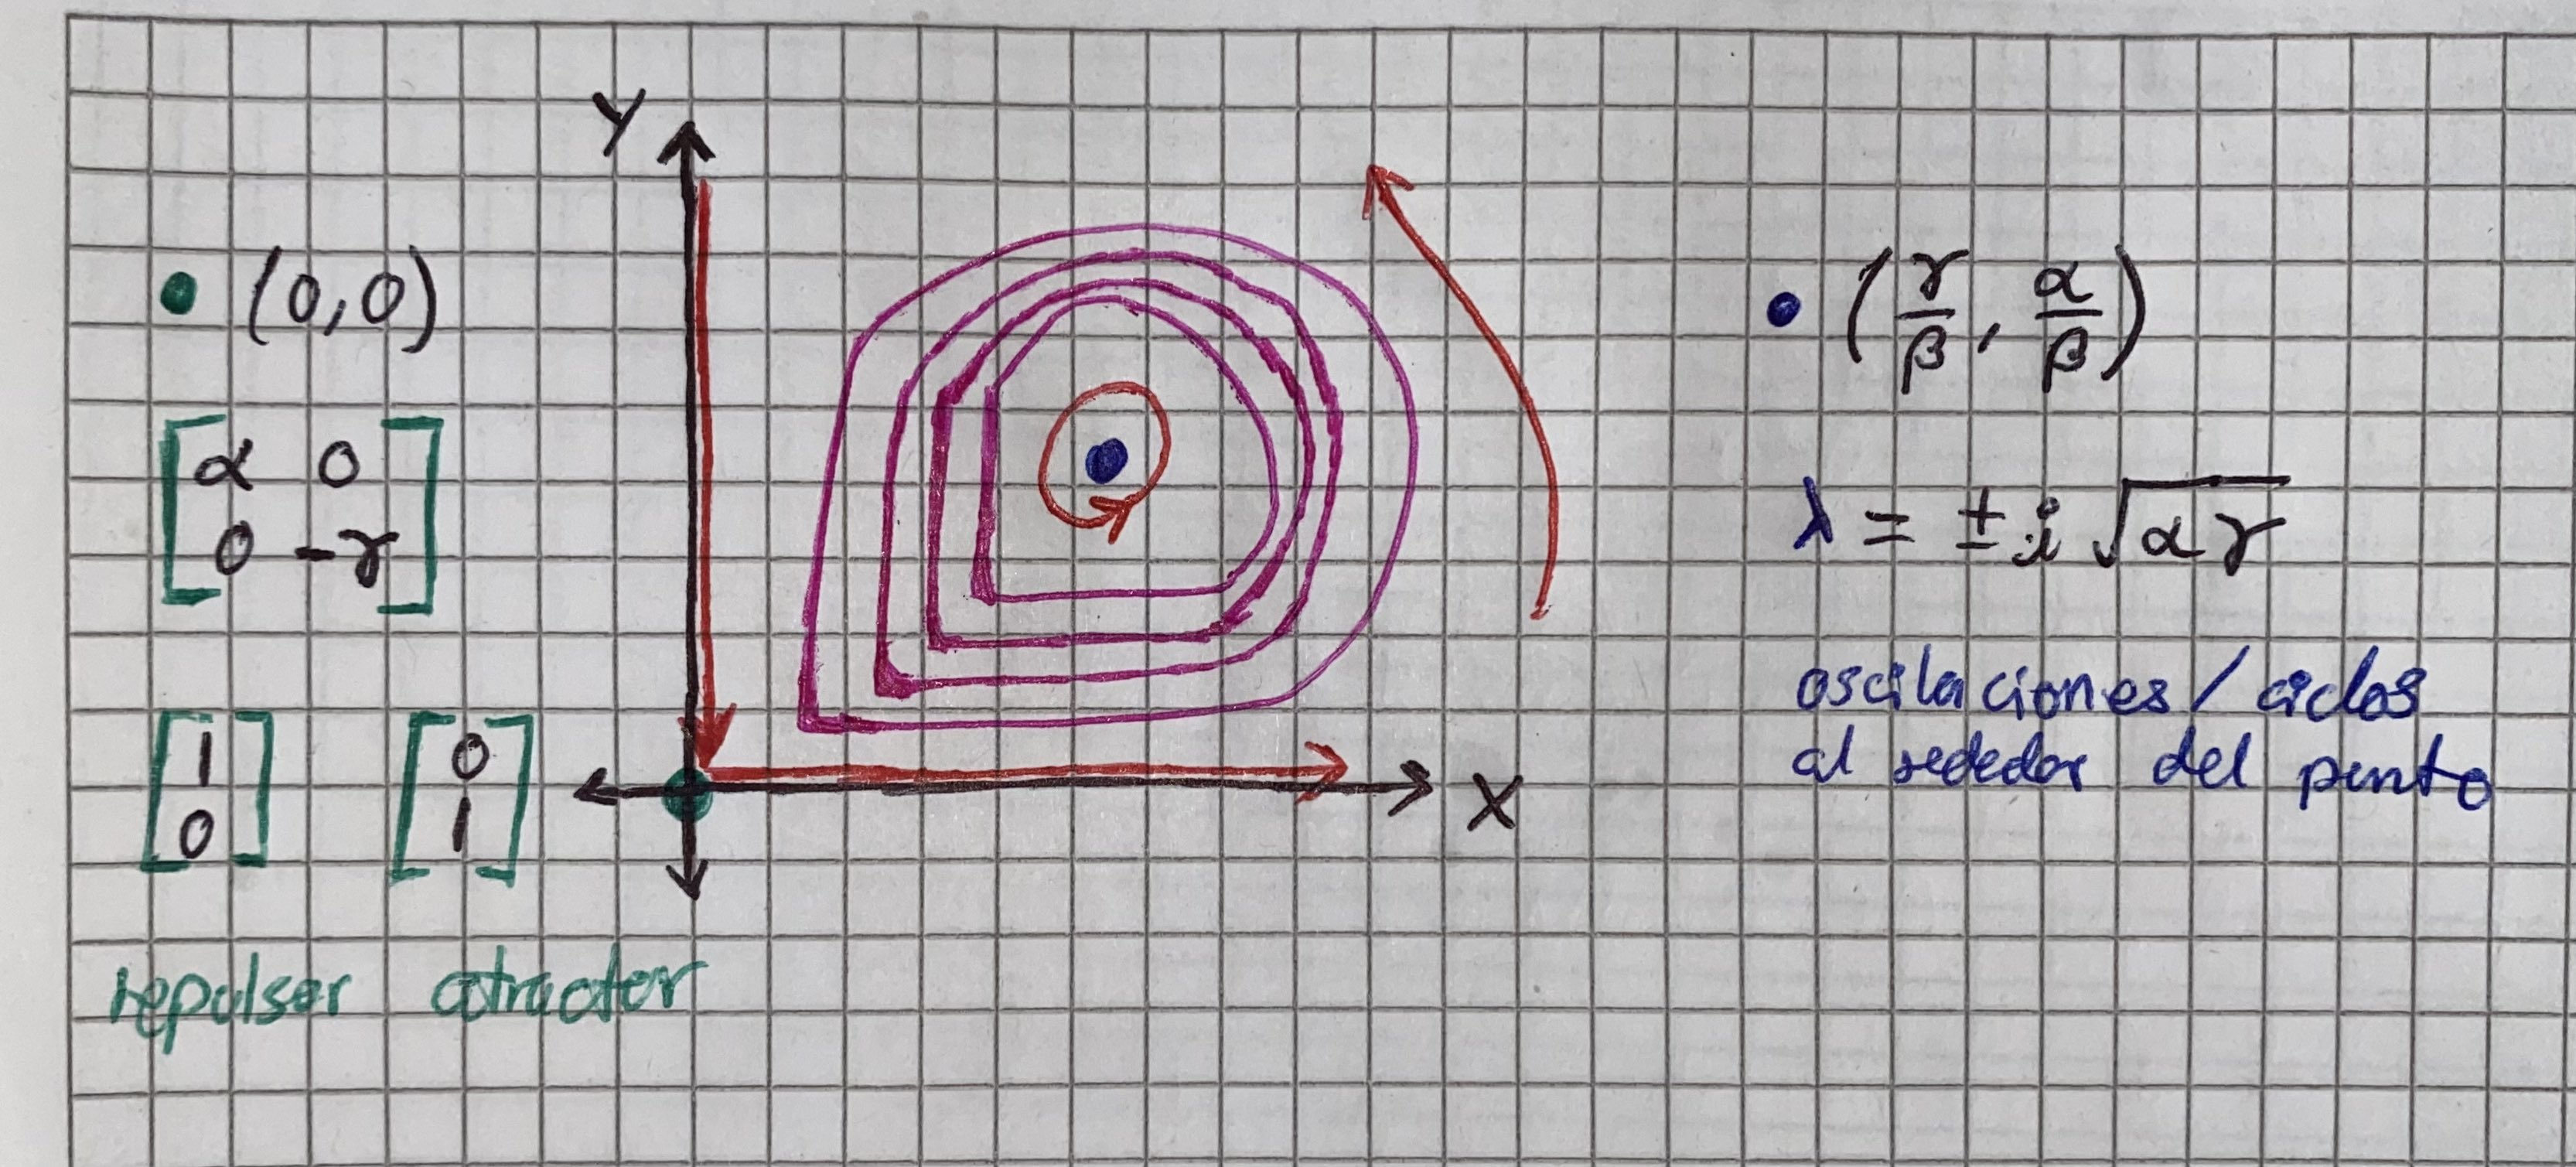

In [5]:
from IPython.display import display, Image
display(Image(filename="bosquejo.jpg"))

<br><br>

**h)**

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define the differential equations of the Lotka-Volterra system
def lotkaVolterra(state, alpha, beta, gamma):
    x, y = state
    dx_dt = alpha * x - beta * x * y
    dy_dt = beta * x * y - gamma * y
    return np.array([dx_dt, dy_dt])

# Function to numerically integrate using Euler's method
def eulerIntegration(dt, initial_conditions, n_steps, alpha, beta, gamma):
    states = np.zeros((n_steps, len(initial_conditions)))
    states[0] = initial_conditions

    for i in range(1, n_steps):
        states[i] = states[i - 1] + dt * lotkaVolterra(states[i - 1], alpha, beta, gamma)

    return states

# Graph the evolution of functions with respect to time
def plotEvolutionLV(index, t, solution, labels, colors, alpha, beta, gamma):
    plt.subplot(1, 3, index+1)
    plt.plot(t, solution[:, index], label=f'α={round(alpha,1)}, β={round(beta,1)}, γ={round(gamma,1)}', color = colors[index])
    plt.title(f'Evolution of {labels[index]} over time', fontstyle='oblique')
    plt.xlabel('Time (t)', fontstyle='italic')
    plt.ylabel(f'{labels[index]}(t)', fontstyle='italic')
    plt.ylim(bottom=-0.5)
    plt.legend(prop={'weight':'bold'})
    plt.grid(True, linestyle='--', alpha=0.6)

# Plot the phase space of functions 
def plotPhaseLV(solution, alpha, beta, gamma):
    plt.subplot(1, 3, 3)
    plt.plot(solution[:, 0], solution[:, 1], color='indianred', label=f'α={round(alpha,1)}, β={round(beta,1)}, γ={round(gamma,1)}')
    plt.title('Phase space', fontstyle='oblique')
    plt.xlabel('x(t)', fontstyle='italic')
    plt.xlim(left=-0.3)
    plt.ylabel('y(t)', fontstyle='italic')
    plt.legend(prop={'weight':'bold'})
    plt.grid(True, linestyle='--', alpha=0.6)
    
# Function to make all graphs with different values
def my_plots(initial_conditions, delta_t, t, alpha, beta, gamma):
    labels, colors = ['x','y'], ['goldenrod','darkcyan'] # Chart labels and colors
    
    # Perform numerical integration
    solution = eulerIntegration(delta_t, initial_conditions, n_steps, alpha, beta, gamma)

    # Graph the evolution of the variables with respect to time and phase space
    plt.figure(figsize=(18, 6))
    for i in range(len(labels)):
        plotEvolutionLV(i,t,solution, labels, colors, alpha, beta, gamma)
    plotPhaseLV(solution, alpha, beta, gamma)

    plt.suptitle(f'Numerical solution to the Lotka-Volterra system with {int(solution[0][0])} initial rabbits and {int(solution[0][1])} initial wolves', fontweight='bold')
    plt.tight_layout()
    plt.show()
    

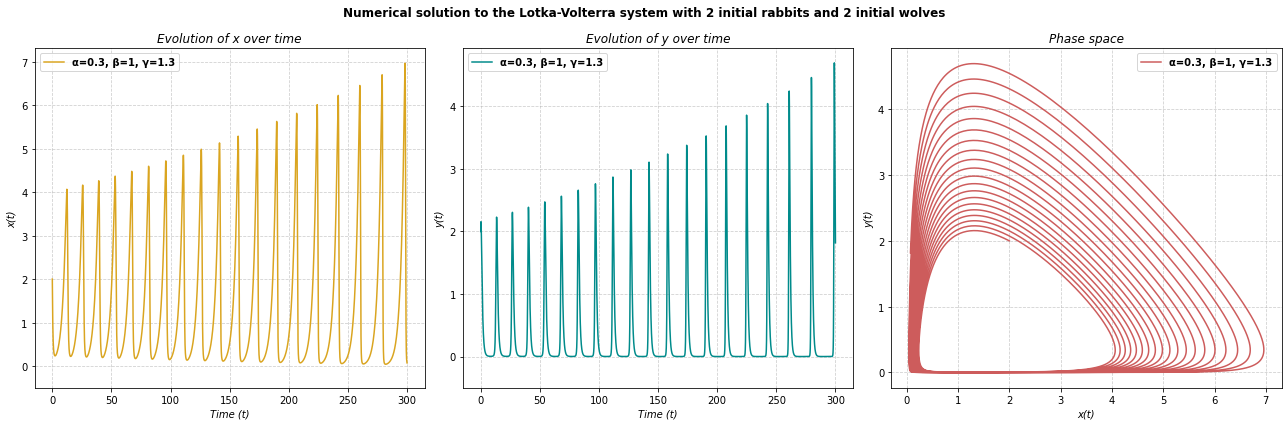

In [15]:
# Define integration parameters and elements to graph
initial_conditions = [2, 2]  # Initial quantities of rabbits (x) and wolves (y)
delta_t, n_steps = 0.01, 30000 
t = np.arange(0, n_steps) * delta_t # Time interval
alpha, beta, gamma = 1/3, 1, 4/3 # System coefficients

my_plots(initial_conditions, delta_t, t, alpha, beta, gamma)

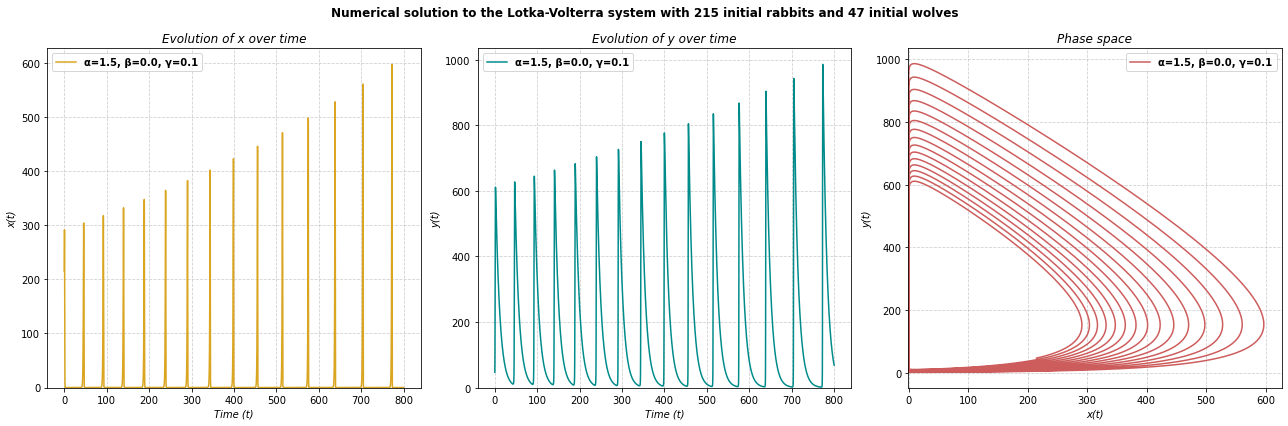

In [16]:
# Define integration parameters and elements to graph
initial_conditions = [215, 47]  # Initial quantities of rabbits (x) and wolves (y)
delta_t, n_steps = 0.01, 80000 
t = np.arange(0, n_steps) * delta_t # Time interval
alpha, beta, gamma = 1.5, .01, 0.1 # System coefficients

my_plots(initial_conditions, delta_t, t, alpha, beta, gamma)

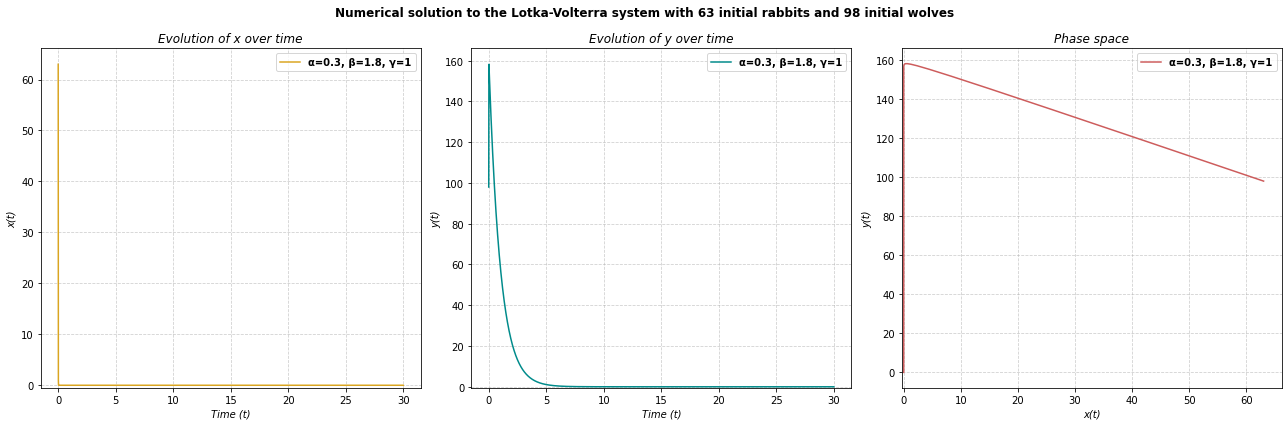

In [17]:
# Define integration parameters and elements to graph
initial_conditions = [63, 98]  # Initial quantities of rabbits (x) and wolves (y)
delta_t, n_steps = 0.001, 30000 
t = np.arange(0, n_steps) * delta_t # Time interval
alpha, beta, gamma = 1/3, 7/4, 1 # System coefficients

my_plots(initial_conditions, delta_t, t, alpha, beta, gamma)

**i)**

To introduce chaos into the Lotka-Volterra model, it is enough to add a new dimensionality through a change of variable. Specifically, we will make the system non-autonomous to introduce variability in the system parameters with respect to time.. 

Periodic or non-periodic functions can be introduced that modify the coefficients $α$, $β$ or $γ$ of the system over time in the following way:  
$$\frac{dx}{dt} = α(t)x - β(t)xy$$
$$\frac{dy}{dt} = β(t)xy - γ(t)y$$
We define our functions $α(t)$, $β(t)$ or $γ(t)$ such that:
$$\alpha(t) = cos(9\pi \cdot 0.1t)$$
$$\beta(t) = sin(\pi t)$$
$$\gamma(t) = sin(1/3 + 0.8t)$$
We change the variable $z = t$ and propose our new system of differential equations
$$\frac{dx}{dt} = (cos(9\pi \cdot 0.1z))x - (sin(\pi z))xy$$
$$\frac{dy}{dt} = (sin(\pi z))xy - sin(1/3 + 0.8z)y$$
$$\frac{dz}{dt} = 1$$

In this way we have added a dimensionality to the Lotka-Volterra model, with quasi-periodic functions for the coefficients. By varying these with respect to time we can generate more complex and chaotic dynamic behaviors in the system..  

<br>

So now we will solve numerically:

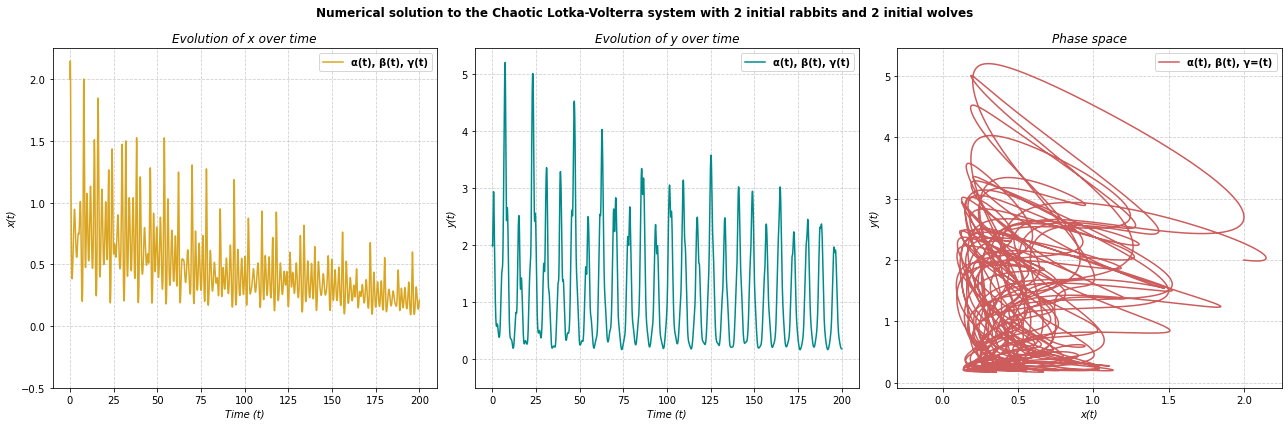

In [19]:
# Function to numerically integrate using Euler's method
def eulerIntegration(initial_conditions, dt, n_steps):
    states = np.zeros((n_steps, len(initial_conditions)))
    states[0] = initial_conditions

    for i in range(1, n_steps):
        t = i * dt
        alpha = timeVaryingAlpha(t)
        beta = timeVaryingBeta(t)
        gamma = timeVaryingGamma(t)
        states[i] = states[i - 1] + dt * lotkaVolterra(states[i - 1], alpha, beta, gamma)  # We keep beta and gamma constant
    return states

# Graph the evolution of functions with respect to time
def plot_evolution_LV(index, t, solution, labels, colors):
    plt.subplot(1, 3, index+1)
    plt.plot(t, solution[:, index], label='α(t), β(t), γ(t)', color = colors[index])
    plt.title(f'Evolution of {labels[index]} over time', fontstyle='oblique')
    plt.xlabel('Time (t)', fontstyle='italic')
    plt.ylabel(f'{labels[index]}(t)', fontstyle='italic')
    plt.ylim(bottom=-0.5)
    plt.legend(prop={'weight':'bold'})
    plt.grid(True, linestyle='--', alpha=0.6)

# Plot the phase space of functions 
def plotPhaseLV(solution):
    plt.subplot(1, 3, 3)
    plt.plot(solution[:, 0], solution[:, 1], color='indianred', label='α(t), β(t), γ=(t)')
    plt.title('Phase space', fontstyle='oblique')
    plt.xlabel('x(t)', fontstyle='italic')
    plt.xlim(left=-0.3)
    plt.ylabel('y(t)', fontstyle='italic')
    plt.legend(prop={'weight':'bold'})
    plt.grid(True, linestyle='--', alpha=0.6)
    
# Define the functions for the variations of alpha, beta and gamma
def timeVaryingAlpha(t):
    return np.cos(9 * np.pi * 0.1 * t)

def timeVaryingBeta(t):
    return np.sin(np.pi * t)

def timeVaryingGamma(t):
    return np.sin(1/3 + 0.8*t)

# Define integration parameters and elements to graph
initial_conditions = [2, 2]  # Initial quantities of rabbits (x) and wolves (y)
delta_t, n_steps = 0.01, 20000 
t = np.arange(0, n_steps) * delta_t # Time interval
labels, colors = ['x','y'], ['goldenrod','darkcyan'] # Chart labels and colors
    
# Perform numerical integration
solution = eulerIntegration(initial_conditions, delta_t, n_steps)

# Graph the evolution of the variables with respect to time and phase space
plt.figure(figsize=(18, 6))
for i in range(len(labels)):
    plot_evolution_LV(i,t,solution, labels, colors)
plotPhaseLV(solution)

plt.suptitle(f'Numerical solution to the Chaotic Lotka-Volterra system with {int(solution[0][0])} initial rabbits and {int(solution[0][1])} initial wolves', fontweight='bold')
plt.tight_layout()
plt.show()